In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
customer = pd.read_csv('../Datasets/Case Study - Customer.csv',sep=';')
product = pd.read_csv('../Datasets/Case Study - Product.csv',sep=';')
transaction = pd.read_csv('../Datasets/Case Study - Transaction.csv',sep=';')
store = pd.read_csv('../Datasets/Case Study - Store.csv',sep=';')

# transaction.head()
# customer.head()
# product.head()
# store.head()

In [22]:
# Mengubah tipe data kolom Date pada dataset transaction menjadi datetime
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

# Mengisi missing value dengan nilai sebelumnya
customer.isna().sum()
customer.fillna(method='ffill', inplace=True)

# membuat tabel utama baru dengan menggabungkan semua tabel
main_table = pd.DataFrame()
main_table = pd.merge(transaction, customer, how='left', on='CustomerID')
main_table = pd.merge(main_table, product, how='left', on='ProductID')
main_table = pd.merge(main_table, store, how='left', on='StoreID')
# main_table.info()
# main_table.isna().sum()
main_table.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,"14,58",Yoghurt,10000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,"0,18",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,"12,57",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,"6,95",Yoghurt,10000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


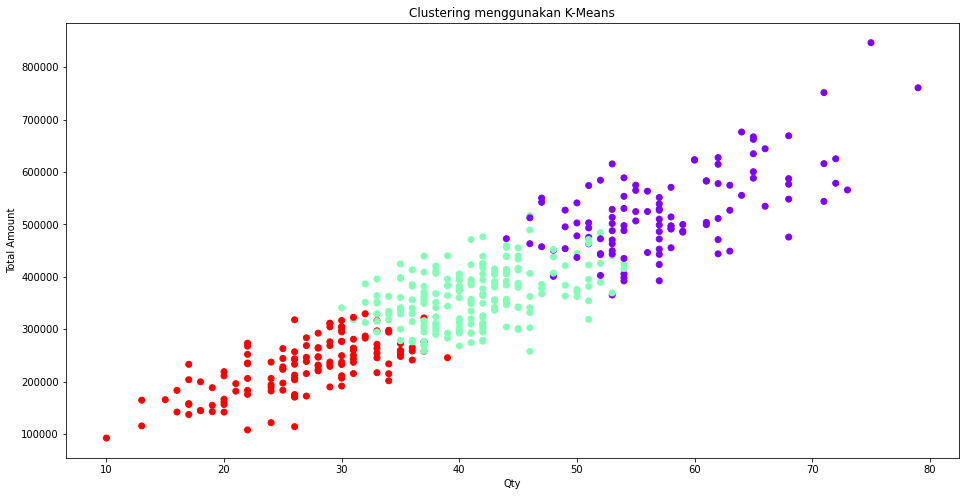

In [23]:
# Data Aggregation
customer_data = main_table.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

# Pilih variabel yang akan digunakan untuk clustering
X = customer_data[['TransactionID', 'Qty', 'TotalAmount']]

# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membuat Model K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Menambahkan label cluster ke DataFrame
labels = kmeans.labels_
customer_data['Cluster'] = labels

# Visualisasi Hasil
plt.figure(figsize=(16,8))
plt.scatter(customer_data['Qty'], customer_data['TotalAmount'], c=customer_data['Cluster'], cmap='rainbow')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering menggunakan K-Means')
plt.show()

Dari visualisasi di atas, Anda dapat melihat bagaimana pelanggan dibagi menjadi beberapa kelompok berdasarkan perilaku pembeliannya.. Misalnya, suatu kelompok mungkin membeli banyak barang, dan total pembayaran yang tinggi mungkin mencerminkan pelanggan yang cenderung menghabiskan uang dalam jumlah besar.. Sebaliknya, klaster dengan jumlah barang yang dibeli sedikit dan jumlah total pembayaran yang rendah mungkin mencerminkan pelanggan membeli dalam jumlah kecil..